<h4>7. Train and fine-tune a Decision Tree for the moons dataset.</h4>

In [16]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np

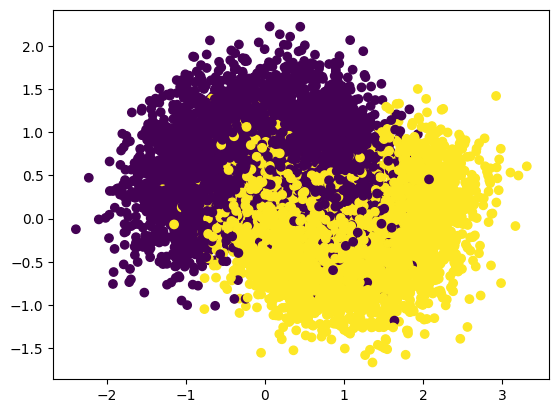

In [2]:
dataset = make_moons(n_samples=10000, noise=0.4, random_state=42)
plt.scatter(dataset[0][:,0], dataset[0][:,1], c=dataset[1])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.2)

In [4]:
len(X_train)

8000

In [5]:
grid_search = GridSearchCV(DecisionTreeClassifier(), {'max_leaf_nodes': [3, 5, 10, 20, 50, 100, 200, 500, 1000]}, cv=3, verbose=2)
grid_search.fit(X_train[:4000], y_train[:4000])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...................................max_leaf_nodes=3; total time=   0.0s
[CV] END ...................................max_leaf_nodes=3; total time=   0.0s
[CV] END ...................................max_leaf_nodes=3; total time=   0.0s
[CV] END ...................................max_leaf_nodes=5; total time=   0.0s
[CV] END ...................................max_leaf_nodes=5; total time=   0.0s
[CV] END ...................................max_leaf_nodes=5; total time=   0.0s
[CV] END ..................................max_leaf_nodes=10; total time=   0.0s
[CV] END ..................................max_leaf_nodes=10; total time=   0.0s
[CV] END ..................................max_leaf_nodes=10; total time=   0.0s
[CV] END ..................................max_leaf_nodes=20; total time=   0.0s
[CV] END ..................................max_leaf_nodes=20; total time=   0.0s
[CV] END ..................................max_le

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [3, 5, 10, 20, 50, 100, 200, 500,
                                            1000]},
             verbose=2)

In [6]:
grid_search.best_estimator_, grid_search.best_score_  

(DecisionTreeClassifier(max_leaf_nodes=20), 0.8612514822858639)

Accuracy is 0.854 with max_leaf_nodes=6. Now we train on the full training set and measure the accuracy on the test set.

In [7]:
grid_search.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=20)

In [8]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.857

Accuracy is 0.8435.

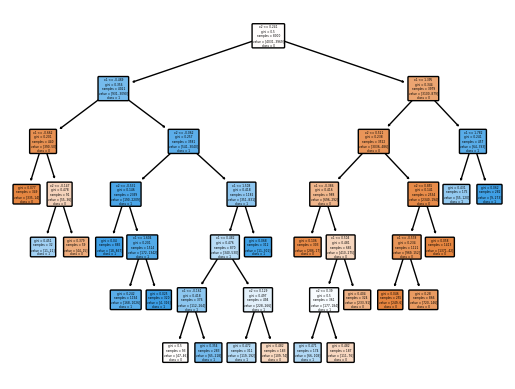

In [9]:
from sklearn.tree import export_graphviz, plot_tree

export_graphviz(grid_search.best_estimator_, out_file='tree.dot', feature_names=['x1', 'x2'], class_names=['0', '1'], rounded=True, filled=True)
plot_tree(grid_search.best_estimator_, feature_names=['x1', 'x2'], class_names=['0', '1'], rounded=True, filled=True);

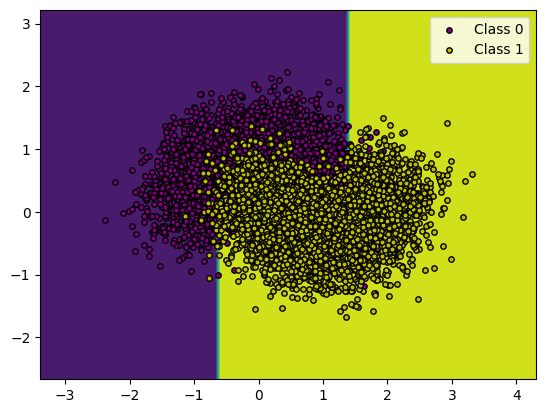

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator( 
        grid_search.best_estimator_,
        X_train,
        response_method="predict")
class_0 = X_train[y_train==0]
class_1 = X_train[y_train==1]
names = ['Class 0', 'Class 1']
plt.scatter(class_0[:,0], class_0[:,1], c='purple', edgecolors='black', s=15, label=names[0])
plt.scatter(class_1[:,0], class_1[:,1], c='y', edgecolors='black', s=15, label=names[1])
plt.legend()

<h4>8. Grow a forest.</h4>

In [11]:
from sklearn.model_selection import ShuffleSplit   
n_trees = 1000
subsets = ShuffleSplit(n_splits=n_trees, train_size=100, random_state=42) 
subsets_pair = []  
for subset in subsets.split(X_train):
    X_train_subset = X_train[subset[0]]
    y_train_subset = y_train[subset[0]]
    subsets_pair.append((X_train_subset, y_train_subset))

In [14]:
from sklearn.base import clone
test_scores = []
forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

for i,(X_train_subset, y_train_subset) in enumerate(subsets_pair):
    forest[i].fit(X_train_subset, y_train_subset)
    y_pred = forest[i].predict(X_test)
    test_scores.append(accuracy_score(y_test, y_pred))
    print(f"Test score {i}: {test_scores[i]}")
    
print(f"Average test score: {sum(test_scores)/n_trees}")

Test score 0: 0.7815
Test score 1: 0.8
Test score 2: 0.811
Test score 3: 0.8005
Test score 4: 0.7825
Test score 5: 0.736
Test score 6: 0.7885
Test score 7: 0.7885
Test score 8: 0.8095
Test score 9: 0.8185
Test score 10: 0.805
Test score 11: 0.799
Test score 12: 0.7945
Test score 13: 0.8115
Test score 14: 0.762
Test score 15: 0.8155
Test score 16: 0.822
Test score 17: 0.7825
Test score 18: 0.792
Test score 19: 0.8135
Test score 20: 0.8465
Test score 21: 0.823
Test score 22: 0.8095
Test score 23: 0.82
Test score 24: 0.8435
Test score 25: 0.809
Test score 26: 0.7715
Test score 27: 0.792
Test score 28: 0.7005
Test score 29: 0.7925
Test score 30: 0.8105
Test score 31: 0.7955
Test score 32: 0.8005
Test score 33: 0.8025
Test score 34: 0.783
Test score 35: 0.8165
Test score 36: 0.7925
Test score 37: 0.796
Test score 38: 0.802
Test score 39: 0.802
Test score 40: 0.808
Test score 41: 0.8075
Test score 42: 0.7955
Test score 43: 0.779
Test score 44: 0.8285
Test score 45: 0.7925
Test score 46: 0.79

In [17]:
y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)
for i, tree in enumerate(forest):
    y_pred[i] = tree.predict(X_test)

In [22]:
from scipy.stats import mode
y_pred_mode, counts = mode(y_pred)

In [27]:
accuracy_score(y_test, y_pred_mode)

0.864

In reality this y_pred_mode is obtained using a random forest classifier.